# Problem Statement

All of us receive a ton of messages and emails on a daily basis. Collectively, that is a lot of data which can provide useful insights about the messages that each of us gets. What if you could know whether a certain message has brought you good news or bad news before opening the actual message. In this challenge, we will use Machine Learning to achieve this.

Given are 53 distinguishing factors that can help in understanding the polarity(Good or Bad) of a message,  your objective as a data scientist is to build a Machine Learning model that can predict whether a text message has brought you good news or bad news.

You are provided with the normalized frequencies of 50 words/emojis (Freq_Of_Word_1 to Freq_Of_Word_50) along with 3 engineered features listed below:

TotalEmojiCharacters: Total number of individual emoji characters normalized. (eg. 🙂 )
LengthOFFirstParagraph: The total length of the first paragraph in words normalized
StylizedLetters: Total number of letters or characters with a styling element normalized

<b> Target Variable: IsGoodNews <b>

# Phase1: Model Building On Training Data

# Step1: Read Data

In [43]:
train = pd.read_csv("Train.csv")
train.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [2]:
train.shape

(947, 54)

In [3]:
train.columns

Index(['Freq_Of_Word_1', 'Freq_Of_Word_2', 'Freq_Of_Word_3', 'Freq_Of_Word_4',
       'Freq_Of_Word_5', 'Freq_Of_Word_6', 'Freq_Of_Word_7', 'Freq_Of_Word_8',
       'Freq_Of_Word_9', 'Freq_Of_Word_10', 'Freq_Of_Word_11',
       'Freq_Of_Word_12', 'Freq_Of_Word_13', 'Freq_Of_Word_14',
       'Freq_Of_Word_15', 'Freq_Of_Word_16', 'Freq_Of_Word_17',
       'Freq_Of_Word_18', 'Freq_Of_Word_19', 'Freq_Of_Word_20',
       'Freq_Of_Word_21', 'Freq_Of_Word_22', 'Freq_Of_Word_23',
       'Freq_Of_Word_24', 'Freq_Of_Word_25', 'Freq_Of_Word_26',
       'Freq_Of_Word_27', 'Freq_Of_Word_28', 'Freq_Of_Word_29',
       'Freq_Of_Word_30', 'Freq_Of_Word_31', 'Freq_Of_Word_32',
       'Freq_Of_Word_33', 'Freq_Of_Word_34', 'Freq_Of_Word_35',
       'Freq_Of_Word_36', 'Freq_Of_Word_37', 'Freq_Of_Word_38',
       'Freq_Of_Word_39', 'Freq_Of_Word_40', 'Freq_Of_Word_41',
       'Freq_Of_Word_42', 'Freq_Of_Word_43', 'Freq_Of_Word_44',
       'Freq_Of_Word_45', 'Freq_Of_Word_46', 'Freq_Of_Word_47',
       'Fre

# Step2: Exploratory Data Analysis

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

## 2.1 Missing Data Analysis 

In [4]:
train.isnull().sum()

Freq_Of_Word_1            0
Freq_Of_Word_2            0
Freq_Of_Word_3            0
Freq_Of_Word_4            0
Freq_Of_Word_5            0
Freq_Of_Word_6            0
Freq_Of_Word_7            0
Freq_Of_Word_8            0
Freq_Of_Word_9            0
Freq_Of_Word_10           0
Freq_Of_Word_11           0
Freq_Of_Word_12           0
Freq_Of_Word_13           0
Freq_Of_Word_14           0
Freq_Of_Word_15           0
Freq_Of_Word_16           0
Freq_Of_Word_17           0
Freq_Of_Word_18           0
Freq_Of_Word_19           0
Freq_Of_Word_20           0
Freq_Of_Word_21           0
Freq_Of_Word_22           0
Freq_Of_Word_23           0
Freq_Of_Word_24           0
Freq_Of_Word_25           0
Freq_Of_Word_26           0
Freq_Of_Word_27           0
Freq_Of_Word_28           0
Freq_Of_Word_29           0
Freq_Of_Word_30           0
Freq_Of_Word_31           0
Freq_Of_Word_32           0
Freq_Of_Word_33           0
Freq_Of_Word_34           0
Freq_Of_Word_35           0
Freq_Of_Word_36     

## 2.2 Data Type Analysis 

In [5]:
train.dtypes

Freq_Of_Word_1            float64
Freq_Of_Word_2            float64
Freq_Of_Word_3            float64
Freq_Of_Word_4            float64
Freq_Of_Word_5            float64
Freq_Of_Word_6            float64
Freq_Of_Word_7            float64
Freq_Of_Word_8            float64
Freq_Of_Word_9            float64
Freq_Of_Word_10           float64
Freq_Of_Word_11           float64
Freq_Of_Word_12           float64
Freq_Of_Word_13           float64
Freq_Of_Word_14           float64
Freq_Of_Word_15           float64
Freq_Of_Word_16           float64
Freq_Of_Word_17           float64
Freq_Of_Word_18           float64
Freq_Of_Word_19           float64
Freq_Of_Word_20           float64
Freq_Of_Word_21           float64
Freq_Of_Word_22           float64
Freq_Of_Word_23           float64
Freq_Of_Word_24           float64
Freq_Of_Word_25           float64
Freq_Of_Word_26           float64
Freq_Of_Word_27           float64
Freq_Of_Word_28           float64
Freq_Of_Word_29           float64
Freq_Of_Word_3

## 2.3 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

<b> Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots: 

In [6]:
train.describe()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,...,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.023323,0.039056,0.020516,0.013038,-0.018424,0.002831,-0.006407,0.008428,0.044759,0.005193,...,0.059328,-0.005919,-0.031999,-0.001397,0.033669,0.013292,-0.013279,-0.021817,0.018881,0.388596
std,1.104679,1.085628,1.026794,1.345090,0.890268,0.970823,0.868676,1.136686,1.179691,1.129019,...,1.169027,0.959135,0.643179,0.821608,1.146482,0.860000,0.958807,0.513887,0.997459,0.487689
min,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.219003,-0.427682,0.000000
25%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.374323,0.000000
50%,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.230681,-0.081172,-0.164107,-0.277435,0.000000
75%,-0.351864,-0.318036,0.326735,-0.039223,0.107252,-0.353977,-0.304257,-0.240708,-0.318797,-0.080193,...,-0.018022,-0.205212,-0.079531,-0.118688,-0.151911,0.145162,-0.054961,-0.038632,-0.039427,1.000000
max,13.771711,11.065546,9.184940,40.442907,8.479498,11.570173,6.461416,25.215295,18.826505,25.078049,...,18.446001,14.997385,13.943676,15.030734,15.146785,15.670854,28.750489,8.419193,12.437402,1.000000


### 2.3.1 Box Plot of CONTINUOUS variables 

In [7]:
train.columns

Index(['Freq_Of_Word_1', 'Freq_Of_Word_2', 'Freq_Of_Word_3', 'Freq_Of_Word_4',
       'Freq_Of_Word_5', 'Freq_Of_Word_6', 'Freq_Of_Word_7', 'Freq_Of_Word_8',
       'Freq_Of_Word_9', 'Freq_Of_Word_10', 'Freq_Of_Word_11',
       'Freq_Of_Word_12', 'Freq_Of_Word_13', 'Freq_Of_Word_14',
       'Freq_Of_Word_15', 'Freq_Of_Word_16', 'Freq_Of_Word_17',
       'Freq_Of_Word_18', 'Freq_Of_Word_19', 'Freq_Of_Word_20',
       'Freq_Of_Word_21', 'Freq_Of_Word_22', 'Freq_Of_Word_23',
       'Freq_Of_Word_24', 'Freq_Of_Word_25', 'Freq_Of_Word_26',
       'Freq_Of_Word_27', 'Freq_Of_Word_28', 'Freq_Of_Word_29',
       'Freq_Of_Word_30', 'Freq_Of_Word_31', 'Freq_Of_Word_32',
       'Freq_Of_Word_33', 'Freq_Of_Word_34', 'Freq_Of_Word_35',
       'Freq_Of_Word_36', 'Freq_Of_Word_37', 'Freq_Of_Word_38',
       'Freq_Of_Word_39', 'Freq_Of_Word_40', 'Freq_Of_Word_41',
       'Freq_Of_Word_42', 'Freq_Of_Word_43', 'Freq_Of_Word_44',
       'Freq_Of_Word_45', 'Freq_Of_Word_46', 'Freq_Of_Word_47',
       'Fre

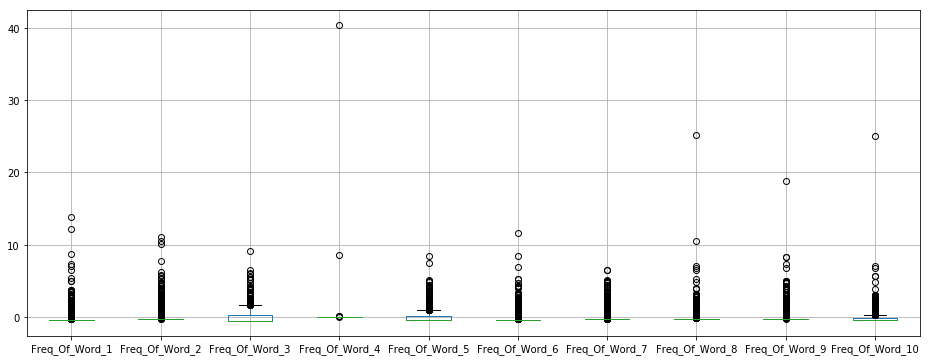

In [9]:
plt.figure(figsize=(16,6))
train.boxplot(column=['Freq_Of_Word_1', 'Freq_Of_Word_2', 'Freq_Of_Word_3', 'Freq_Of_Word_4',
                      'Freq_Of_Word_5', 'Freq_Of_Word_6', 'Freq_Of_Word_7', 'Freq_Of_Word_8',
                      'Freq_Of_Word_9', 'Freq_Of_Word_10'])


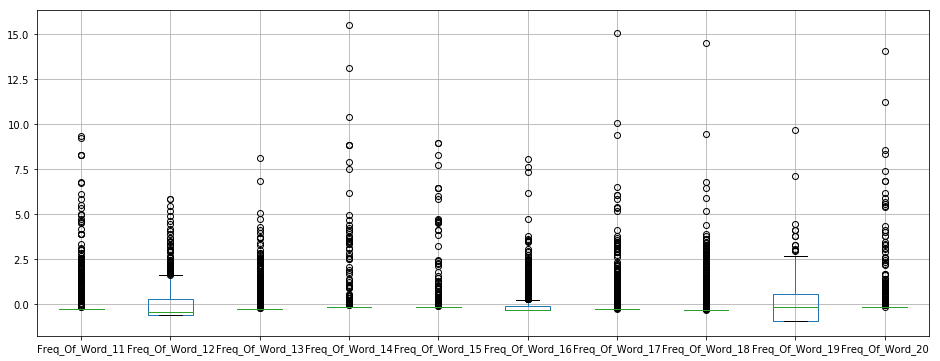

In [10]:
plt.figure(figsize=(16,6))
train.boxplot(column=['Freq_Of_Word_11', 'Freq_Of_Word_12', 'Freq_Of_Word_13', 'Freq_Of_Word_14', 
                      'Freq_Of_Word_15', 'Freq_Of_Word_16', 'Freq_Of_Word_17', 'Freq_Of_Word_18', 
                      'Freq_Of_Word_19', 'Freq_Of_Word_20'])


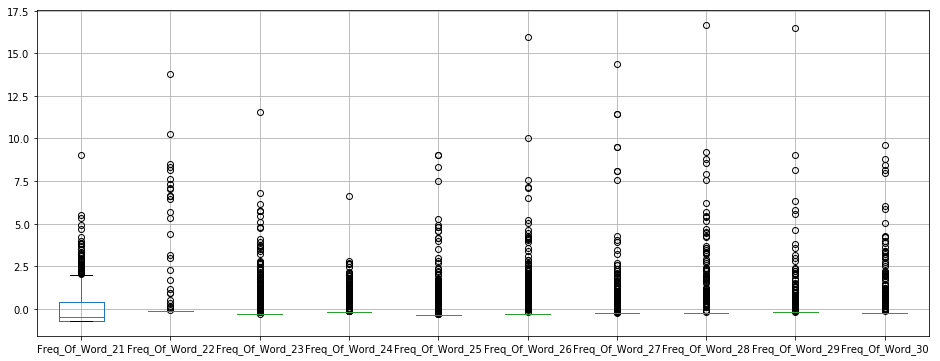

In [11]:

plt.figure(figsize=(16,6))
train.boxplot(column=['Freq_Of_Word_21', 'Freq_Of_Word_22', 'Freq_Of_Word_23', 'Freq_Of_Word_24', 
                      'Freq_Of_Word_25', 'Freq_Of_Word_26', 'Freq_Of_Word_27', 'Freq_Of_Word_28', 
                      'Freq_Of_Word_29', 'Freq_Of_Word_30'])


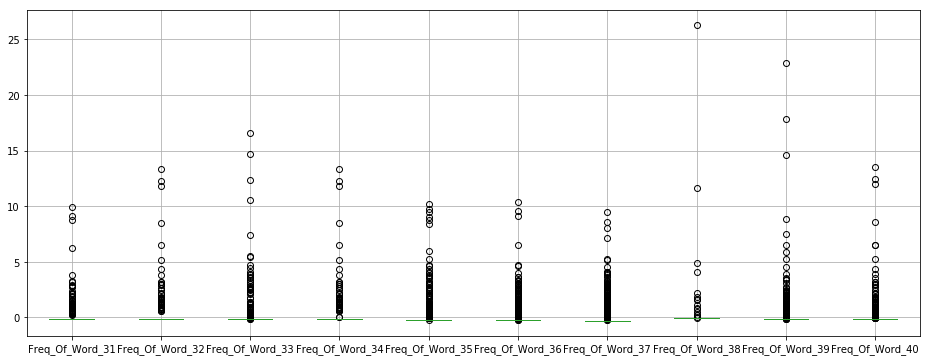

In [12]:

plt.figure(figsize=(16,6))
train.boxplot(column=['Freq_Of_Word_31', 'Freq_Of_Word_32', 'Freq_Of_Word_33', 'Freq_Of_Word_34', 
                      'Freq_Of_Word_35', 'Freq_Of_Word_36', 'Freq_Of_Word_37', 'Freq_Of_Word_38',
                        'Freq_Of_Word_39', 'Freq_Of_Word_40'])


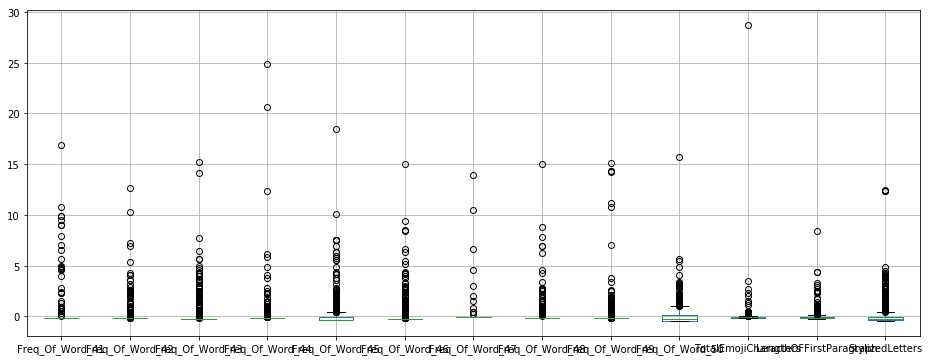

In [13]:

plt.figure(figsize=(16,6))
train.boxplot(column=['Freq_Of_Word_41', 'Freq_Of_Word_42', 'Freq_Of_Word_43', 'Freq_Of_Word_44',
       'Freq_Of_Word_45', 'Freq_Of_Word_46', 'Freq_Of_Word_47', 'Freq_Of_Word_48', 'Freq_Of_Word_49', 
        'Freq_Of_Word_50', 'TotalEmojiCharacters', 'LengthOFFirstParagraph', 'StylizedLetters'])

<b> From the plots we can see that, there are lots of outliers in each varibale. </b>

### 2.3.2 Plot for Continuous variables

### 2.3.3 Histogram Plots Of Continuous Variables 

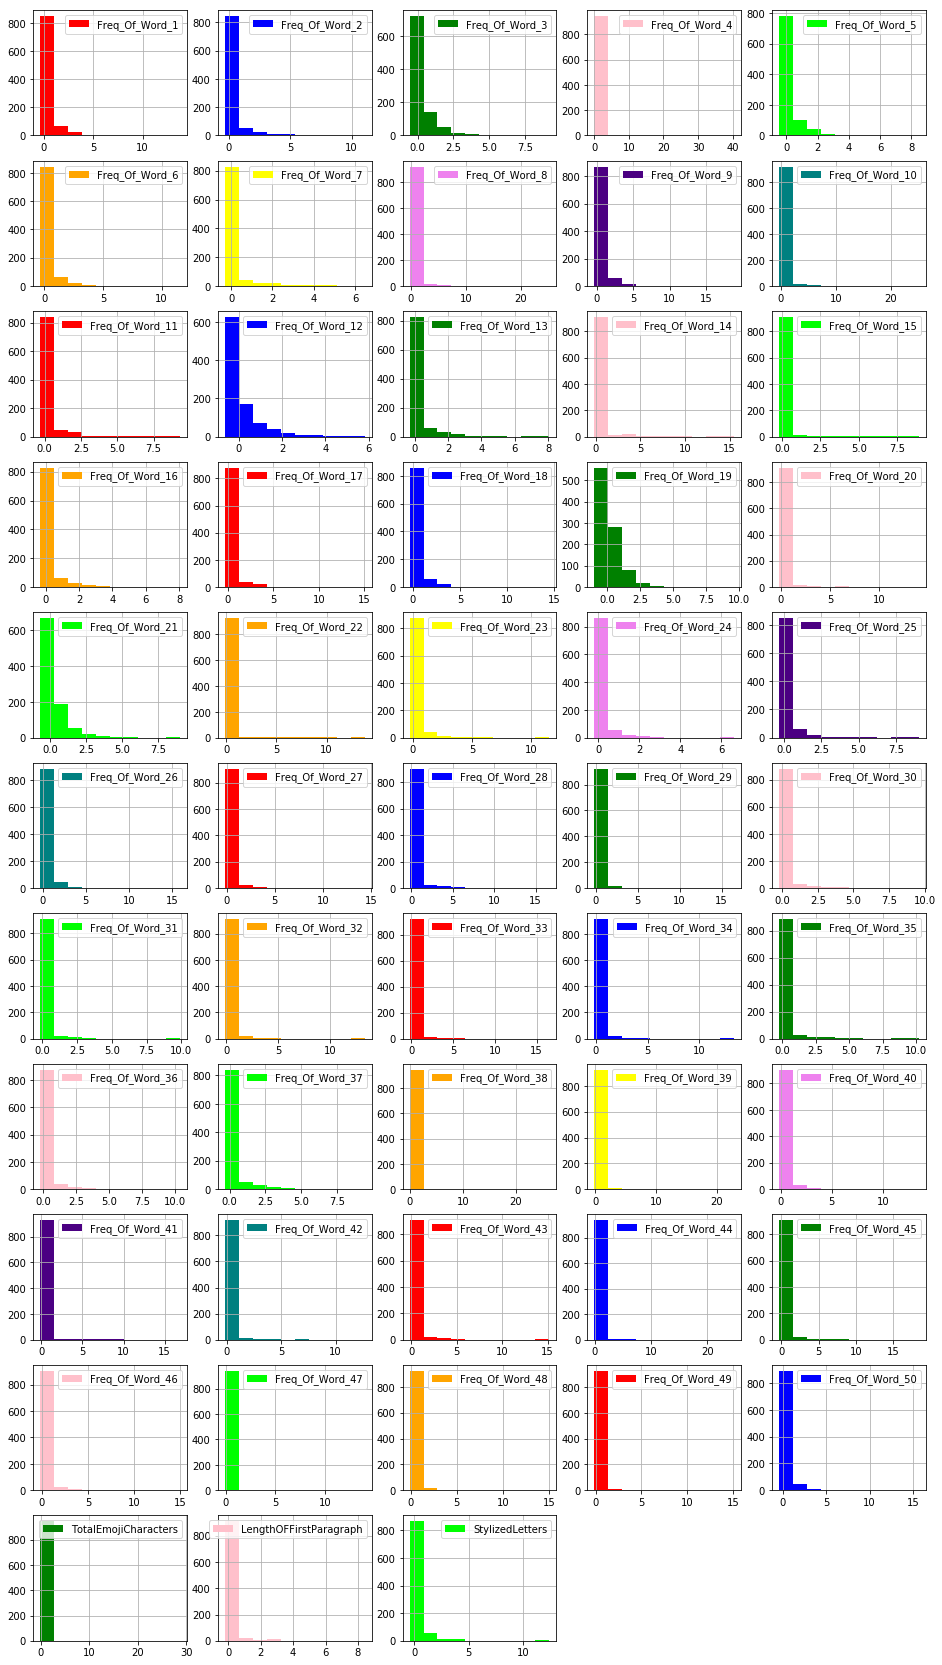

In [20]:
plt.figure(figsize=(16,30))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime']
for i,j in zip(range(1,54),train.columns[:-1]):
    plt.subplot(11,5,i)
    train[j].hist(color = clr[i-1], label=j)
    plt.legend()
    

### 2.3.5 Target Variable Plot

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


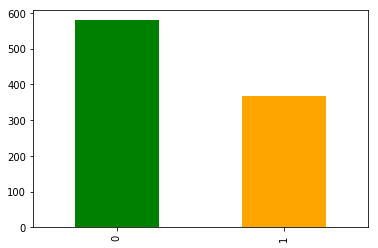

In [23]:
train.IsGoodNews.value_counts().plot(kind='bar', colors=['green', 'orange'])

# 2.4 Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

### 2.4.1 Correlation Matrix Plot

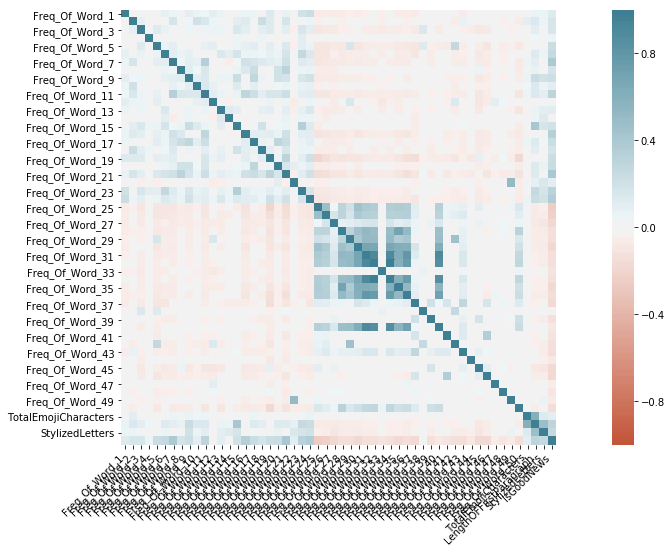

In [24]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Step3: Data Transformation

There are various methods used to transform variables. Some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods. <br>

<b> Logarithm: </b> Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well. <br> <br>
<b> Square / Cube root: </b> The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero. <br> <br>
<b> Binning: </b> It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.

## 3.1 Outlier Treatment

In [35]:
train.columns

Index(['Freq_Of_Word_1', 'Freq_Of_Word_2', 'Freq_Of_Word_3', 'Freq_Of_Word_4',
       'Freq_Of_Word_5', 'Freq_Of_Word_6', 'Freq_Of_Word_7', 'Freq_Of_Word_8',
       'Freq_Of_Word_9', 'Freq_Of_Word_10', 'Freq_Of_Word_11',
       'Freq_Of_Word_12', 'Freq_Of_Word_13', 'Freq_Of_Word_14',
       'Freq_Of_Word_15', 'Freq_Of_Word_16', 'Freq_Of_Word_17',
       'Freq_Of_Word_18', 'Freq_Of_Word_19', 'Freq_Of_Word_20',
       'Freq_Of_Word_21', 'Freq_Of_Word_22', 'Freq_Of_Word_23',
       'Freq_Of_Word_24', 'Freq_Of_Word_25', 'Freq_Of_Word_26',
       'Freq_Of_Word_27', 'Freq_Of_Word_28', 'Freq_Of_Word_29',
       'Freq_Of_Word_30', 'Freq_Of_Word_31', 'Freq_Of_Word_32',
       'Freq_Of_Word_33', 'Freq_Of_Word_34', 'Freq_Of_Word_35',
       'Freq_Of_Word_36', 'Freq_Of_Word_37', 'Freq_Of_Word_38',
       'Freq_Of_Word_39', 'Freq_Of_Word_40', 'Freq_Of_Word_41',
       'Freq_Of_Word_42', 'Freq_Of_Word_43', 'Freq_Of_Word_44',
       'Freq_Of_Word_45', 'Freq_Of_Word_46', 'Freq_Of_Word_47',
       'Fre

In [45]:
#Replacing outliers with Median
for col in train.columns[:-1]:
    pct25 = np.percentile(train[col], 25)
    pct75 = np.percentile(train[col], 75)
    iqr = pct75 - pct25
    lower_leaf = pct25 - 1.5*iqr
    upper_leaf = pct75 + 1.5*iqr
    train[col] = train[col].apply(lambda x: train[col].median() if x < lower_leaf or x > upper_leaf else x)
    

In [41]:
a = input()

if a.lower() == "army":
    print("Y")
elif a.lower() == "is army":
    print("Y")
else:
    print("N")

is ArmY
Y


## 3.1 Data Stadardization

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [65]:
scaled_features = sc.fit_transform(train[train.columns[:-1]].values)

In [66]:
scaled_train_df = pd.DataFrame(scaled_features, index=train.index, columns=train.columns[:-1])

In [26]:
# Log Transformation of Positively skewed Data
#for col in train.columns[:-1]:
#    train[col] = np.log(train[col])

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [67]:
scaled_train_df['IsGoodNews'] = train['IsGoodNews']

### 3.1.1 Replacing (-Inf) Negative Infinity Values With Median Of The Variable

In [60]:
for col in scaled_train_df.columns[:-1]:
    scaled_train_df[col] = scaled_train_df[col].apply(lambda x: scaled_train_df[col].median() if x == -np.inf else x)

In [61]:
for col in scaled_train_df.columns[:-1]:
    scaled_train_df[col] = scaled_train_df[col].apply(lambda x: scaled_train_df[col].median() if x == np.inf else x)

### 3.1.2 Re-plotting The Distribution of Variables After Transformation

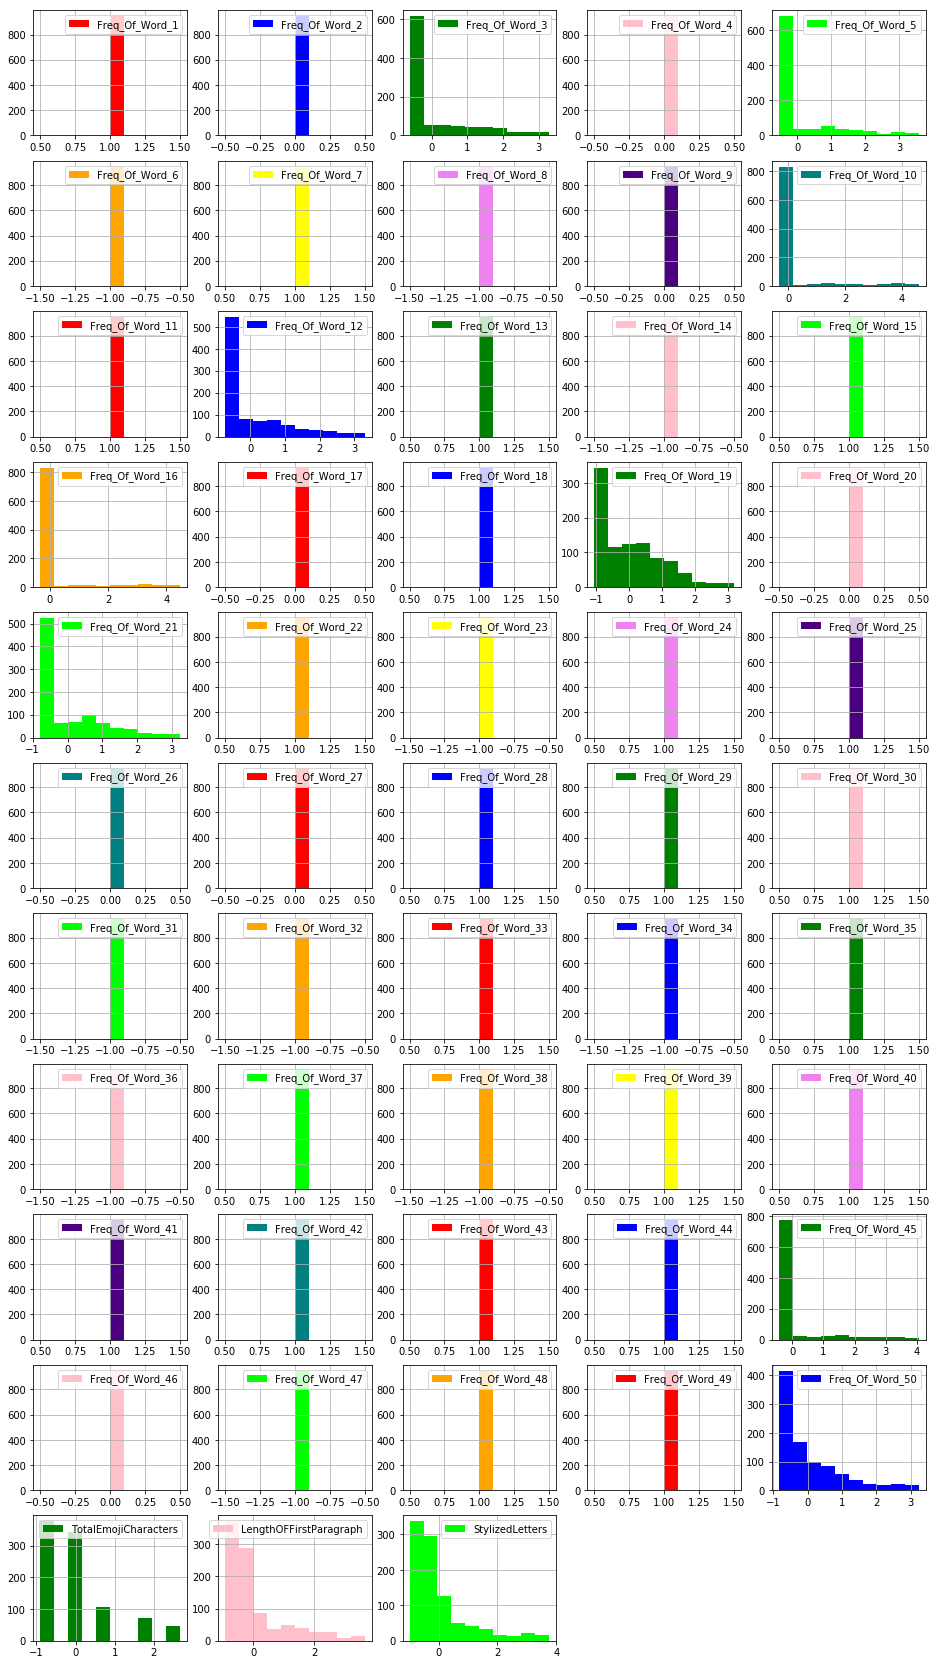

In [70]:
plt.figure(figsize=(16,30))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime']
for i,j in zip(range(1,54),scaled_train_df.columns[:-1]):
    plt.subplot(11,5,i)
    scaled_train_df[j].hist(color = clr[i-1], label=j)
    plt.legend()
    

## 3.4 New Variables Creation

In [71]:
train.isnull().sum()

Freq_Of_Word_1            0
Freq_Of_Word_2            0
Freq_Of_Word_3            0
Freq_Of_Word_4            0
Freq_Of_Word_5            0
Freq_Of_Word_6            0
Freq_Of_Word_7            0
Freq_Of_Word_8            0
Freq_Of_Word_9            0
Freq_Of_Word_10           0
Freq_Of_Word_11           0
Freq_Of_Word_12           0
Freq_Of_Word_13           0
Freq_Of_Word_14           0
Freq_Of_Word_15           0
Freq_Of_Word_16           0
Freq_Of_Word_17           0
Freq_Of_Word_18           0
Freq_Of_Word_19           0
Freq_Of_Word_20           0
Freq_Of_Word_21           0
Freq_Of_Word_22           0
Freq_Of_Word_23           0
Freq_Of_Word_24           0
Freq_Of_Word_25           0
Freq_Of_Word_26           0
Freq_Of_Word_27           0
Freq_Of_Word_28           0
Freq_Of_Word_29           0
Freq_Of_Word_30           0
Freq_Of_Word_31           0
Freq_Of_Word_32           0
Freq_Of_Word_33           0
Freq_Of_Word_34           0
Freq_Of_Word_35           0
Freq_Of_Word_36     

### 3.4.3 Data Normalization

#### 3.4.3.1 LOG of Values

### Testing of Data after Transformation

# Step4: Separating X and Y

In [72]:
scaled_train_df.columns

Index(['Freq_Of_Word_1', 'Freq_Of_Word_2', 'Freq_Of_Word_3', 'Freq_Of_Word_4',
       'Freq_Of_Word_5', 'Freq_Of_Word_6', 'Freq_Of_Word_7', 'Freq_Of_Word_8',
       'Freq_Of_Word_9', 'Freq_Of_Word_10', 'Freq_Of_Word_11',
       'Freq_Of_Word_12', 'Freq_Of_Word_13', 'Freq_Of_Word_14',
       'Freq_Of_Word_15', 'Freq_Of_Word_16', 'Freq_Of_Word_17',
       'Freq_Of_Word_18', 'Freq_Of_Word_19', 'Freq_Of_Word_20',
       'Freq_Of_Word_21', 'Freq_Of_Word_22', 'Freq_Of_Word_23',
       'Freq_Of_Word_24', 'Freq_Of_Word_25', 'Freq_Of_Word_26',
       'Freq_Of_Word_27', 'Freq_Of_Word_28', 'Freq_Of_Word_29',
       'Freq_Of_Word_30', 'Freq_Of_Word_31', 'Freq_Of_Word_32',
       'Freq_Of_Word_33', 'Freq_Of_Word_34', 'Freq_Of_Word_35',
       'Freq_Of_Word_36', 'Freq_Of_Word_37', 'Freq_Of_Word_38',
       'Freq_Of_Word_39', 'Freq_Of_Word_40', 'Freq_Of_Word_41',
       'Freq_Of_Word_42', 'Freq_Of_Word_43', 'Freq_Of_Word_44',
       'Freq_Of_Word_45', 'Freq_Of_Word_46', 'Freq_Of_Word_47',
       'Fre

## 4.1 Re-setting Index Before Splitting

In [73]:
scaled_train_df.reset_index(drop=True, inplace=True)

## 4.2 Split Data

In [74]:
x = scaled_train_df.drop(['IsGoodNews'], axis=1)
y = scaled_train_df['IsGoodNews']

# Step5: Creating Train and Test Set In Ratio 80:20

In [75]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Step6: Model Building

## 6.1 Identification Of Best Features

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)


Num Features: 3
Selected Features: [False False  True False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False]
Feature Ranking: [43 49  1 48  3 19 18 16 45  8 14 10 21 23 25  7 44 28  2 46  1 30 32 34
 36 50 51 38 40 42 41 39 37 35 33 31 29 27 17 15 13 20 22 12  6 47 24 26
 11  5  1  4  9]


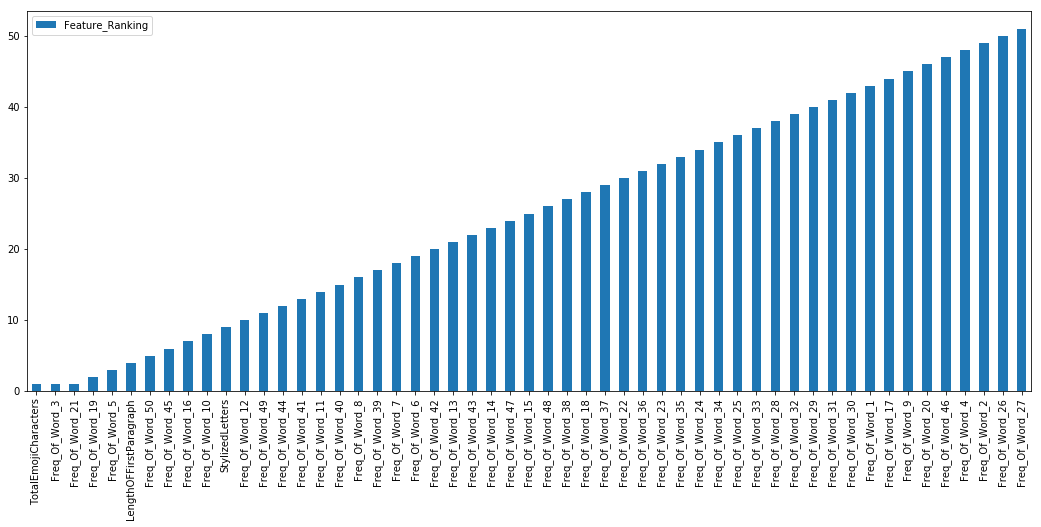

In [77]:
df_feat.sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

## 6.2 Importing and Model Fitting

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


### 6.2.1 Decision Trees

In [79]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_dt = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of Decision Trees: ",accuracy_score(y_test, predictions))

print("*******************CLASSIFICATION - REPORT***************************************************************")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




*******************ACCURACY***************************************************************
Accuracy of Decision Trees:  0.7315789473684211
*******************CLASSIFICATION - REPORT***************************************************************
Confusion matrix 
 [[87 23]
 [28 52]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       110
           1       0.69      0.65      0.67        80

   micro avg       0.73      0.73      0.73       190
   macro avg       0.72      0.72      0.72       190
weighted avg       0.73      0.73      0.73       190



c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 6.2.2 Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



Accuracy of Random Forest:  0.8421052631578947
Confusion matrix 
 [[100  10]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.86      0.75      0.80        80

   micro avg       0.84      0.84      0.84       190
   macro avg       0.85      0.83      0.83       190
weighted avg       0.84      0.84      0.84       190



In [87]:
X_test.shape

(190, 53)

# Phase2: Applying Model On Test Data

In [81]:
test = pd.read_csv('Test.csv')

test.shape

(527, 53)

In [82]:
test.head(5)

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_44,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters
0,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.120401,-0.323019,1.284346,-0.079531,-0.118688,-0.151911,-0.453742,-0.002540,-0.007263,-0.283052
1,-0.351864,-0.318036,-0.561952,-0.039223,0.007071,-0.353977,-0.304257,-0.240708,-0.318797,0.570271,...,0.291256,-0.323019,-0.205212,-0.079531,-0.118688,1.070723,1.147411,-0.054961,-0.148423,0.049739
2,0.006107,-0.318036,-0.351725,-0.039223,-0.307783,0.027319,-0.304257,-0.240708,3.430188,-0.352968,...,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.121342,0.068771,-0.054961,-0.062158,0.322149
3,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,2.089042,-0.240708,-0.318797,-0.352968,...,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,0.065290,0.304055,-0.054961,0.008422,-0.204418
4,0.624420,0.609973,-0.561952,-0.039223,0.393482,0.685920,-0.304257,1.134053,-0.318797,-0.352968,...,-0.120401,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.191555,-0.313944


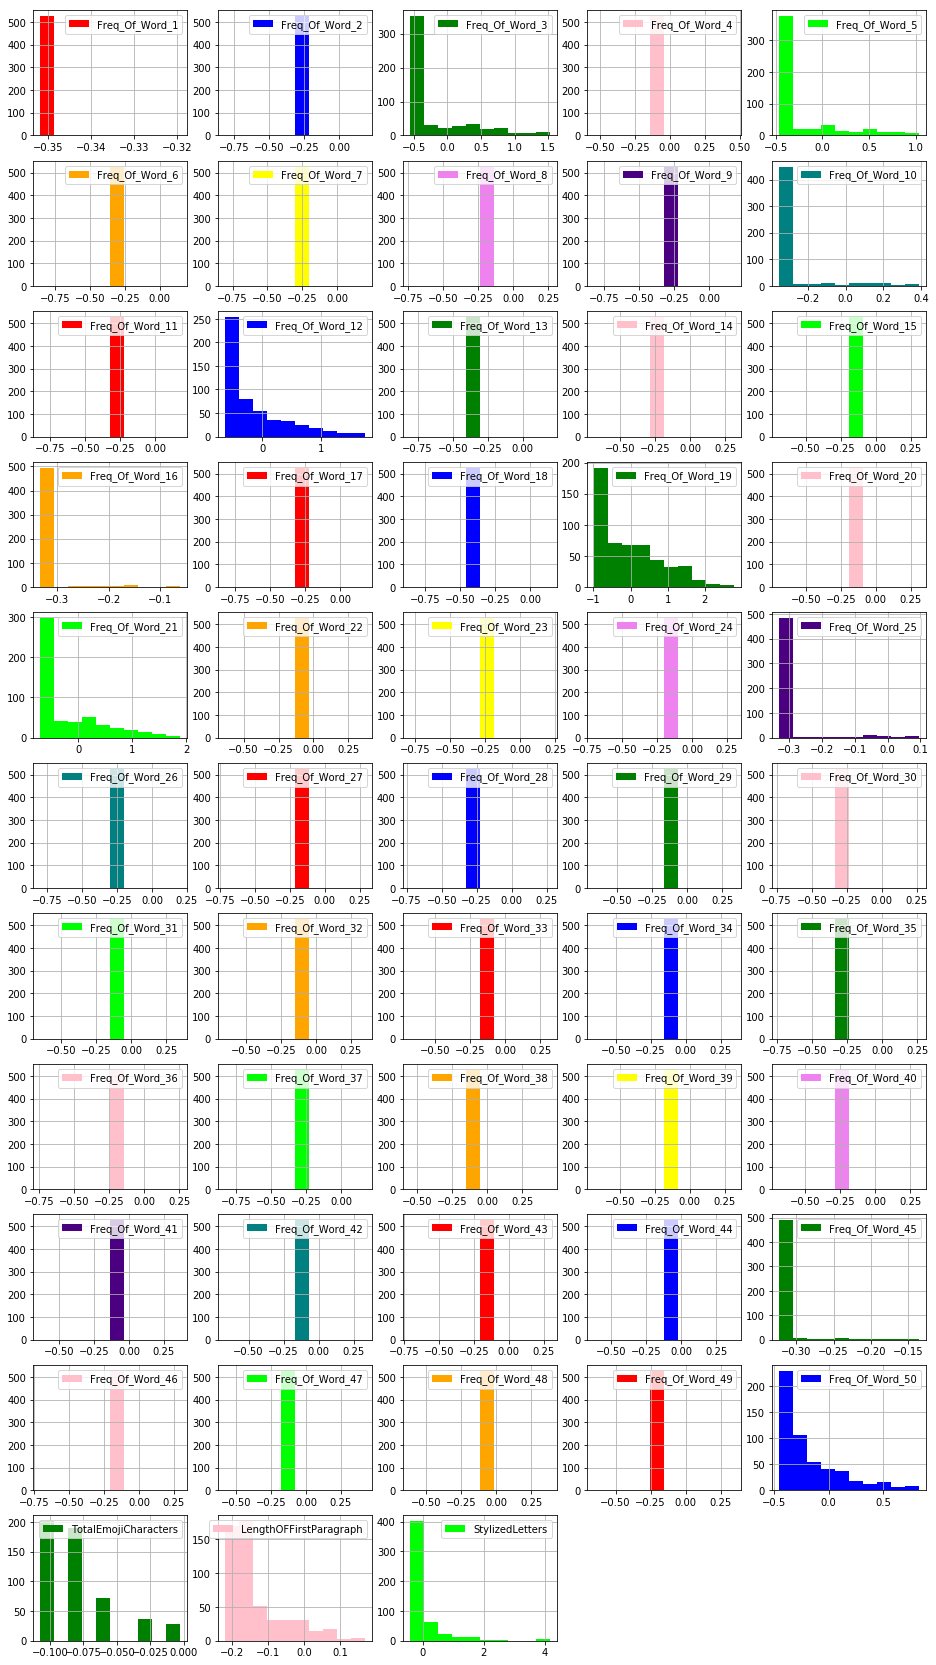

In [89]:
plt.figure(figsize=(16,30))
clr=['red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime','orange','yellow','violet','indigo','teal','red','blue','green','pink','lime','orange',
    'red','blue','green','pink','lime']

for i,j in zip(range(1,54),test.columns):
    plt.subplot(11,5,i)
    test[j].hist(color = clr[i-1], label=j)
    plt.legend()
    


In [92]:
#Replacing outliers with Median
for col in test.columns:
    pct25 = np.percentile(test[col], 25)
    pct75 = np.percentile(test[col], 75)
    iqr = pct75 - pct25
    lower_leaf = pct25 - 1.5*iqr
    upper_leaf = pct75 + 1.5*iqr
    test[col] = test[col].apply(lambda x: test[col].median() if x < lower_leaf or x > upper_leaf else x)
    

scaled_features = sc.fit_transform(test.values)

scaled_test_df = pd.DataFrame(scaled_features, index=test.index, columns=test.columns)

scaled_test_df.reset_index(drop=True, inplace=True)

In [93]:
test_for_prediction = scaled_test_df

In [94]:
test_for_prediction.shape

(527, 53)

In [95]:
#Predict

prediction_from_dt  = best_clf_dt.predict(test_for_prediction)
df_prediction_from_dt = pd.DataFrame({'IsGoodNews': prediction_from_dt})
df_prediction_from_dt.to_excel("Final_output_prediction_from_dt.xlsx")

prediction_from_rf  = best_clf_rf.predict(test_for_prediction)
df_prediction_from_rf = pd.DataFrame({'IsGoodNews': prediction_from_rf})
df_prediction_from_rf.to_excel("Final_output_prediction_from_rf.xlsx")
